In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,neighbors
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,HalvingGridSearchCV

from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
data = datasets.fetch_california_housing() 
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state =25)

In [101]:
st = StandardScaler()
st.fit(x_train)
x_train = st.transform(x_train)
x_test = st.transform(x_test)
#归一化，其实我试了差距似乎不大

In [102]:
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_test, y_test))

0.6745966452847802


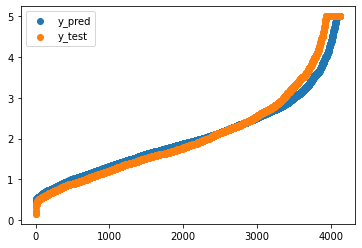

In [103]:
y_pred.sort()
y_test.sort()
x = np.arange(1,len(y_pred)+1)
pplot = plt.scatter(x,y_pred)
Tplot = plt.scatter(x,y_test)
plt.legend(handles=[pplot,Tplot],labels = ["y_pred","y_test"])
plt.show()

In [104]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state =30)
st = StandardScaler()
st.fit(x_train)
x_train = st.transform(x_train)
x_test = st.transform(x_test)

KNeighborsRegressor(n_neighbors=13, weights='distance')
0.6765383640815446


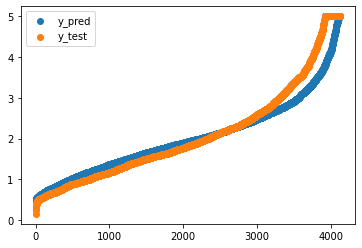

In [105]:
param_grid = {'weights':['uniform','distance'],'n_neighbors':[k for k in range(1,25)]}
knn = neighbors.KNeighborsRegressor()
grid = GridSearchCV(knn,param_grid)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
bestknn = grid.best_estimator_
y_npred = bestknn.predict(x_test)
print(bestknn.score(x_test, y_test))
#暴力搜索
y_npred.sort()
y_test.sort()
x = np.arange(1,len(y_npred)+1)
pplot = plt.scatter(x,y_npred)
Tplot = plt.scatter(x,y_test)
plt.legend(handles=[pplot,Tplot],labels = ["y_pred","y_test"])
plt.show()

In [106]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state =30)
st = StandardScaler()
st.fit(x_train)
x_train = st.transform(x_train)
x_test = st.transform(x_test)

KNeighborsRegressor(n_neighbors=13, weights='distance')
0.6765383640815446


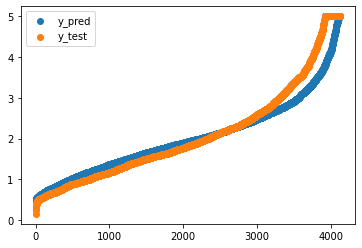

In [107]:
param_grid = {'weights':['uniform','distance'],'n_neighbors':[k for k in range(1,25)]}
knn = neighbors.KNeighborsRegressor()
grid = HalvingGridSearchCV(knn,param_grid)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
bestknn = grid.best_estimator_
y_npred = bestknn.predict(x_test)
print(bestknn.score(x_test, y_test))
#暴力搜索
y_npred.sort()
y_test.sort()
x = np.arange(1,len(y_npred)+1)
pplot = plt.scatter(x,y_npred)
Tplot = plt.scatter(x,y_test)
plt.legend(handles=[pplot,Tplot],labels = ["y_pred","y_test"])
plt.show()